#### Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn

#Take in the data from the AdData.csv file.
dataSet = pd.read_csv('AdData.csv')
dataSet

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


#### Data Pre Processing

In [2]:
# Drop the unecessary columns.
dataSet.drop('User ID', inplace=True, axis=1)
dataSet

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
# Renamimg colums to make it easier to work with.
dataSet = dataSet.rename(columns={'EstimatedSalary':'Salary'})
dataSet

,Gender,Age,Salary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [4]:
# Decision Trees only work with numerical values and not Labels so these must be encoded.
# We encode the values in the Gender Column to be 1 or 0 for male and female retrospectively.
genderL = LabelEncoder()
dataSet['Gender'] = genderL.fit_transform(dataSet['Gender'])
dataSet.head()

,Gender,Age,Salary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [5]:
# Check the shape of the data set. Number of rows and columns.
dataSet.shape

(400, 4)

In [6]:
# Check for null values in the data set.
dataSet.isnull().sum()

Gender       0
Age          0
Salary       0
Purchased    0
dtype: int64

<p>We have no such values in our data set but if you happen to have missing data or null values what to do is clearly explained in the following articles:
    
1. https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html
    
2. https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html</p>

In [7]:
# Each Row is mapped to our target varaible "Purchased"
dataSet.Purchased

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
# Seperate your Target and the rest of the data.
y = dataSet['Purchased']
X = dataSet.drop(['Purchased'], axis=1)

# Create the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, stratify=y, test_size = 0.20)

# Check the distribution of the training set.
y_train.value_counts(normalize=True)

0    0.64375
1    0.35625
Name: Purchased, dtype: float64

In [9]:
# Check the distribution of the test set.
y_test.value_counts(normalize=True)

0    0.6375
1    0.3625
Name: Purchased, dtype: float64

In [10]:
# Check the shapes of the training sets.
X_train.shape, y_train.shape

((320, 3), (320,))

In [11]:
# Check the shapes of the test sets.
X_test.shape, y_test.shape

((80, 3), (80,))

In [12]:
# Create the decision tree function.
theModel = RandomForestClassifier(random_state=10)

# Fit the model.
theModel.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [13]:
#Check the Training Score. (% of how accurate it is).
theModel.score(X_train, y_train)

1.0

In [14]:
#Check the Test Score. (% of how accurate it is).
theModel.score(X_test, y_test)

0.875

In [15]:
# Create the decision tree function. A n_estimators=1 parameter can be supplied to determine how many decision
# trees to use.
theModel = RandomForestClassifier(random_state=10, n_estimators=1)

# Fit the model.
theModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1, random_state=10)

In [16]:
# Check the Training Score. (% of how accurate it is).
theModel.score(X_train, y_train)

0.95

In [17]:
# Check the Test Score. (% of how accurate it is).
theModel.score(X_test, y_test)

0.9

<p>As you can see above specifing how many decision trees to use with the n_estimators parameter changed the accuracy of our test and train sets. You can tune this depending on your data set but in our data set using the default gave us the best accuracy as the train accuracy was 100%</p>

In [18]:
# Create the Random forrest tree function.
theModel = RandomForestClassifier(random_state=10)

# Fit the model.
theModel.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [19]:
#Check the Training Score. (% of how accurate it is).
theModel.score(X_train, y_train)

1.0

In [20]:
#Check the Test Score. (% of how accurate it is).
theModel.score(X_test, y_test)

0.875

In [21]:
# Let's create a Confussion Matrix to see where our model performs well and where it performs poorely for the
# test set
y_pred = theModel.predict(X_test)

# Plotting the confussion matrix
conMat = confusion_matrix(y_test, y_pred)
conMat

array([[46,  5],
       [ 5, 24]])

Text(78.0, 0.5, 'Purchased')

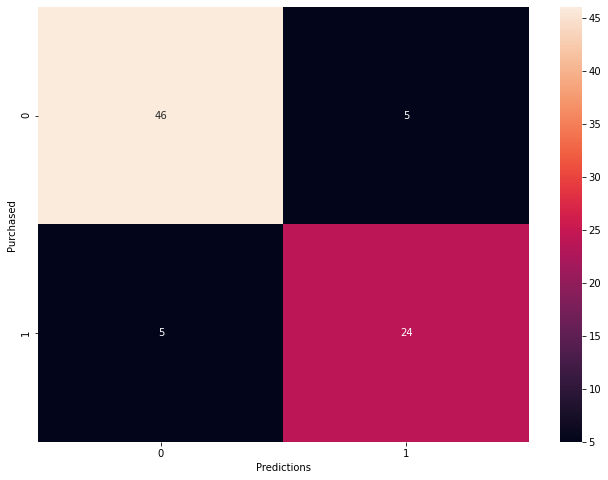

In [22]:
# Plotting the same confusion matrix but making it Visually appealing
plt.figure(figsize=(11,8))
sn.heatmap(conMat, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Purchased')

<p>The above confussion matrix provides amaizing insight into our predictions. We can see above in the top left that when the Purchased result was 0 the prediction was also 0 46 times. We can also so in the bottom right that when the actual Purchased result was 1 the prediction was also 1 24 times. For the other two alternatives we can see that the incorrect result was predicted 5 and 5 times.</p>

In [23]:
# Let's create a Confussion Matrix to see where our model performs well and where it performs poorely for the train
# set
y_pred2 = theModel.predict(X_train)

# Plotting the confussion matrix
conMat2 = confusion_matrix(y_train, y_pred2)
conMat2

array([[206,   0],
       [  0, 114]])

Text(78.0, 0.5, 'Purchased')

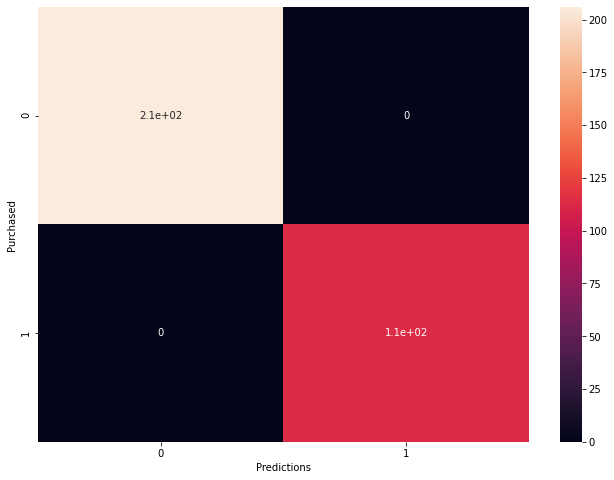

In [24]:
# Plotting the same confusion matrix but making it Visually appealing
plt.figure(figsize=(11,8))
sn.heatmap(conMat2, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Purchased')

<p>Once again the above confussion matrix provides amaizing insight into our predictions. We can see that our prediction in the train set were correct 100% if the times as the incorrect girds have 0 and 0 in them.</p>

In [25]:
# Let's create a Confussion Matrix to see where our model performs well and where it performs poorely for the full
# dataset
y_pred3 = theModel.predict(X)

# Plotting the confussion matrix
conMat3 = confusion_matrix(y, y_pred3)
conMat3

array([[252,   5],
       [  5, 138]])

Text(78.0, 0.5, 'Purchased')

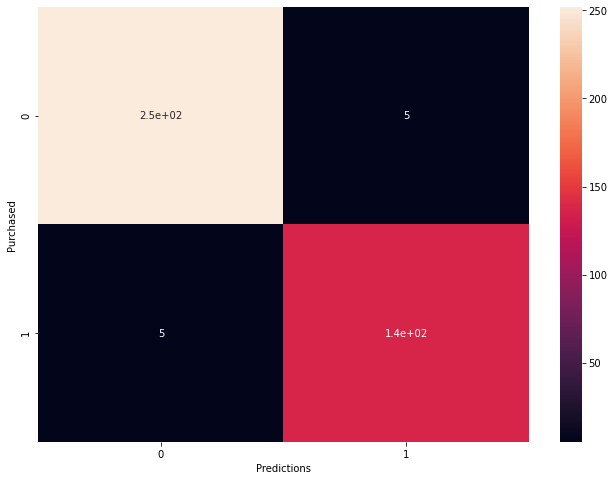

In [26]:
# Plotting the same confusion matrix but making it Visually appealing
plt.figure(figsize=(11,8))
sn.heatmap(conMat3, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Purchased')

<p>Once again the above confussion matrix provides amaizing insight into our predictions.</p>

<p>As you now know. A random Forest is made from a large amount of decision trees and it is possible to  view each one of these decision trees. Bellow is shown how to view the different decision trees of the random forest.</p>

[Text(468.19687500000003, 516.4200000000001, 'X[0] <= 0.5\ngini = 0.462\nsamples = 206\nvalue = [204, 116]'),
 Text(313.875, 462.06000000000006, 'X[2] <= 86500.0\ngini = 0.447\nsamples = 99\nvalue = [108, 55]'),
 Text(167.4, 407.70000000000005, 'X[2] <= 39500.0\ngini = 0.326\nsamples = 75\nvalue = [101, 26]'),
 Text(83.7, 353.34000000000003, 'X[2] <= 28500.0\ngini = 0.487\nsamples = 25\nvalue = [25, 18]'),
 Text(41.85, 298.98, 'X[1] <= 40.0\ngini = 0.208\nsamples = 11\nvalue = [15, 2]'),
 Text(20.925, 244.62, 'gini = 0.0\nsamples = 9\nvalue = [15, 0]'),
 Text(62.775000000000006, 244.62, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(125.55000000000001, 298.98, 'X[1] <= 43.5\ngini = 0.473\nsamples = 14\nvalue = [10, 16]'),
 Text(104.625, 244.62, 'gini = 0.0\nsamples = 5\nvalue = [10, 0]'),
 Text(146.475, 244.62, 'gini = 0.0\nsamples = 9\nvalue = [0, 16]'),
 Text(251.10000000000002, 353.34000000000003, 'X[1] <= 46.5\ngini = 0.172\nsamples = 50\nvalue = [76, 8]'),
 Text(209.25, 298.98,

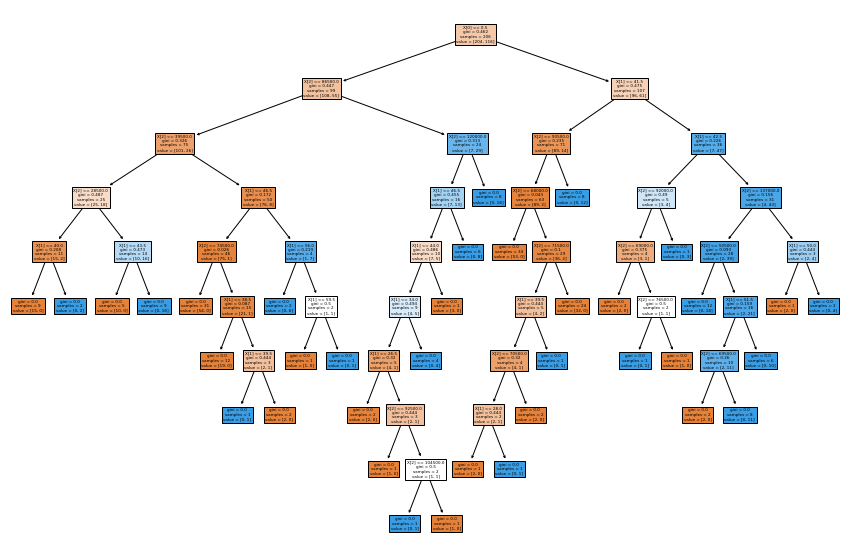

In [27]:
# You can choose which decision tree you wish to view by simply changning the numberical value in the 
# theModel.estimators_[2] parameter
plt.figure(figsize=(15,10))
tree.plot_tree(theModel.estimators_[1], filled=True)

In [28]:
#Predictions for the test set.
theModel.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [29]:
# Convert y_test into an array so we can put it into a data Frame.
y_testArray = y_test.values.reshape(-1,1)

# Save the predictions into x.
x = theModel.predict(X_test)

#Insert the y_test actual values and the predictions into the data frame.
X_test.insert(loc=3,column='Predictions', value=x)
X_test.insert(loc=4,column='ActualResults', value=y_testArray)
X_test

,Gender,Age,Salary,Predictions,ActualResults
289,0,37,78000,0,1
80,1,30,80000,0,0
340,0,53,104000,1,1
236,1,40,57000,0,0
100,1,27,88000,0,0
...,...,...,...,...,...
208,0,40,142000,1,1
281,1,35,61000,0,0
131,1,33,31000,0,0
243,0,56,104000,1,1


In [30]:
#This is how you can view individual rows in the data frame. Simply change the number.
X_test.loc[100,:]

Gender               1
Age                 27
Salary           88000
Predictions          0
ActualResults        0
Name: 100, dtype: int64

In [31]:
#Predictions for the train set.
x3 = theModel.predict(X_train)
x3

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [32]:
# Convert y_train into an array so we can put it into a data Frame.
y_trainArray = y_train.values.reshape(-1,1)

# Insert the y_t actual values and the predictions into the data frame.
trainFrame = X_train
trainFrame.insert(loc=3,column='Predictions', value=x3)
trainFrame.insert(loc=4,column='ActualResults', value=y_trainArray)
trainFrame

,Gender,Age,Salary,Predictions,ActualResults
298,1,45,79000,0,0
13,1,32,18000,0,0
301,1,48,74000,1,1
53,0,35,23000,0,0
61,1,25,87000,0,0
...,...,...,...,...,...
196,0,30,79000,0,0
193,1,19,70000,0,0
121,1,37,72000,0,0
74,1,32,18000,0,0


In [33]:
# This is how you can view individual rows in the data frame. Simply change the number.
trainFrame.loc[3,:]

Gender               0
Age                 27
Salary           57000
Predictions          0
ActualResults        0
Name: 3, dtype: int64

In [34]:
# Predictions for the entire data set.
finalX = theModel.predict(X)
finalX

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [35]:
# Save into a new data frame and add the Predictions Column
finalDataFrame = dataSet
finalDataFrame.insert(loc=4,column='Predictions', value=finalX)
finalDataFrame

,Gender,Age,Salary,Purchased,Predictions
0,1,19,19000,0,0
1,1,35,20000,0,0
2,0,26,43000,0,0
3,0,27,57000,0,0
4,1,19,76000,0,0
...,...,...,...,...,...
395,0,46,41000,1,0
396,1,51,23000,1,1
397,0,50,20000,1,1
398,1,36,33000,0,0


In [36]:
#This is how you can view individual rows in the data frame. Simply change the number.
finalDataFrame.loc[2,:]

Gender             0
Age               26
Salary         43000
Purchased          0
Predictions        0
Name: 2, dtype: int64

In [40]:
theModel.predict([4,3,3])

ValueError: Expected 2D array, got 1D array instead:
array=[4. 3. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.